In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas_datareader as pdr
import datetime


In [92]:
df = pd.read_csv("./합천다목적댐_1997_2023_새롭.csv", index_col='시간')
df.index = pd.to_datetime(df.index)
df.head()

,댐이름,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),저수위(현재),...,저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,수계,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일
시간,,,,,,,,,,,,,,,,,,,,,
1997-01-29 23:00:00,합천,0.0,0.0,0.0,0.0,0.0,1.7,148.88,246.6,149.22,...,277.6,39.6,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1997-01-30 11:00:00,합천,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,149.21,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1997-01-30 12:00:00,합천,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,149.20,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1997-01-30 14:00:00,합천,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,149.20,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0
1997-01-30 15:00:00,합천,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,149.20,...,276.6,41.7,0.0,9.8,31.7,낙동강,13.0,13.0,23.0,0.0


In [174]:
hourDf = df.resample(rule="H").mean()

/var/folders/k7/9gs0gtnx2mq7v2qxmtqtbmbh0000gn/T/ipykernel_1871/457517262.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourDf = df.resample(rule="H").mean()


In [173]:
# hourDf = hourDf['1997-02-01 00:00:00':]
hourDf.head(20)

,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),저수위(현재),저수량(현재),저수위(예년),저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일
시간,,,,,,,,,,,,,,,,,,,,
1997-02-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 01:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 02:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 03:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 04:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 05:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 06:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 07:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0
1997-02-01 08:00:00,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.06,248.7,150.65,274.3,42.5,0.0,9.8,31.5,13.0,13.0,23.0,0.0


In [111]:
hourDf_ma = hourDf.rolling(6).mean()

In [169]:
nalist

DatetimeIndex(['1997-02-01 00:00:00', '1997-02-01 01:00:00',
               '1997-02-01 02:00:00', '1997-02-01 03:00:00',
               '1997-02-01 04:00:00', '1997-02-01 05:00:00',
               '1997-02-01 06:00:00', '1997-02-01 07:00:00',
               '1997-02-01 08:00:00', '1997-02-01 09:00:00',
               ...
               '2023-04-05 14:00:00', '2023-04-05 15:00:00',
               '2023-04-05 16:00:00', '2023-04-05 17:00:00',
               '2023-04-05 18:00:00', '2023-04-05 19:00:00',
               '2023-04-05 20:00:00', '2023-04-05 21:00:00',
               '2023-04-05 22:00:00', '2023-04-05 23:00:00'],
              dtype='datetime64[ns]', name='시간', length=229440, freq='H')

In [172]:
nalist = hourDf.isnull().index
nalist


DatetimeIndex(['1997-02-01 00:00:00', '1997-02-01 01:00:00',
               '1997-02-01 02:00:00', '1997-02-01 03:00:00',
               '1997-02-01 04:00:00', '1997-02-01 05:00:00',
               '1997-02-01 06:00:00', '1997-02-01 07:00:00',
               '1997-02-01 08:00:00', '1997-02-01 09:00:00',
               ...
               '2023-04-05 14:00:00', '2023-04-05 15:00:00',
               '2023-04-05 16:00:00', '2023-04-05 17:00:00',
               '2023-04-05 18:00:00', '2023-04-05 19:00:00',
               '2023-04-05 20:00:00', '2023-04-05 21:00:00',
               '2023-04-05 22:00:00', '2023-04-05 23:00:00'],
              dtype='datetime64[ns]', name='시간', length=229440, freq='H')

In [145]:
nalist[0].to_datetime()

AttributeError: 'Timestamp' object has no attribute 'to_datetime'

In [167]:
hourDf.loc['1997-02-01 09:00:00']

발전량(실적)      NaN
발전량(계획)      NaN
발전량(계획대비)    NaN
연간발전계획       NaN
연간계획대비       NaN
전일유입량        NaN
저수위(전년)      NaN
저수량(전년)      NaN
저수위(현재)      NaN
저수량(현재)      NaN
저수위(예년)      NaN
저수량(예년)      NaN
예년누계강우량      NaN
강우량전일        NaN
금년누계강우량      NaN
현재저수율        NaN
전일방류량(본댐)    NaN
전일방류량(조정지)   NaN
전년누계강우량      NaN
강우량금일        NaN
Name: 1997-02-01 09:00:00, dtype: float64

In [168]:
for i in nalist:
    a = datetime.datetime.fromtimestamp(i.timestamp()).strftime("%Y-%m-%d %H:%M:%S")
    hourDf.loc[a] = hourDf_ma.loc[a]
    # print(hourDf[a])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 548, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 2263, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 2273, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1680739200000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 516, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas/_libs/index.pyx", line 550, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2023-04-06 00:00:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  Fi

In [ ]:
dailyDf = df.resample(rule="D").mean()
dailyDf.head(10)

In [17]:
dailyDf.to_csv("./합천다목적댐_1997_2023_일별평균값.csv")

In [12]:
dailyDf = pd.read_csv("./합천다목적댐_1997_2023_일별평균값.csv", index_col='시간')
dailyDf.index = pd.to_datetime(dailyDf.index)


Text(0.5, 1.0, '전체 전일유입량')

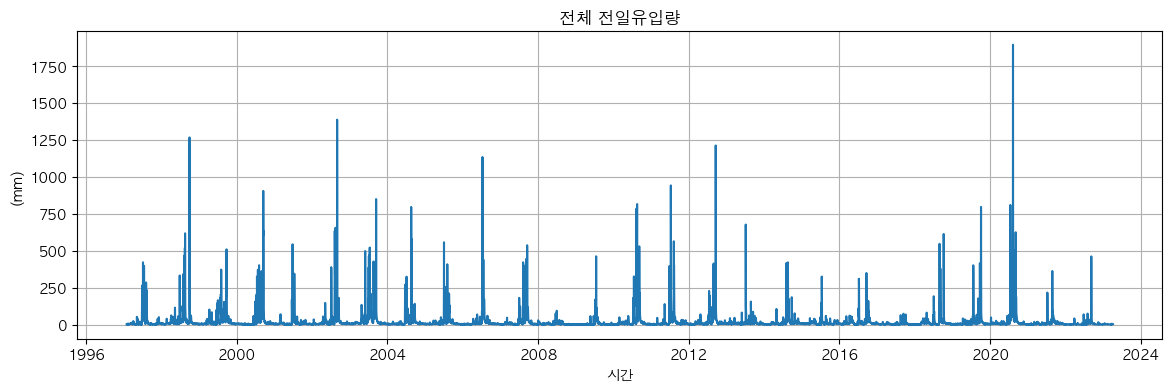

In [41]:
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True
sns.lineplot(dailyDf, x='시간', y='전일유입량')
# sns.lineplot(dailyDf, x='시간', y='발전량(실적)', label="실적량")
plt.ylabel("(mm)")
plt.title("전체 전일유입량")

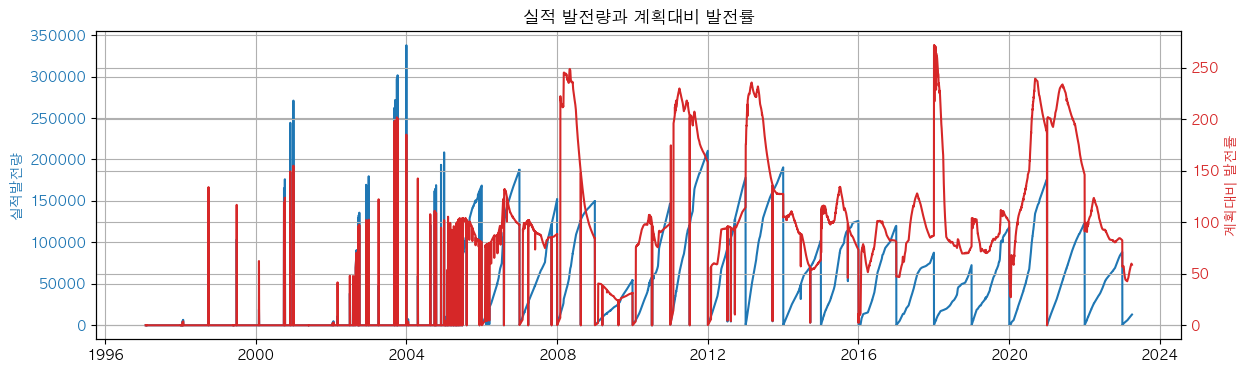

<Figure size 5600x900 with 0 Axes>

In [43]:
# plot with 2 different axes for a dataset with different scales
# left side

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(56,9))
plt.rcParams["figure.figsize"] = (14,4)


color_1 = 'tab:blue'
ax1.set_title('실적 발전량과 계획대비 발전률')
ax1.set_ylabel('실적발전량', color=color_1)
ax1.plot(dailyDf.index, dailyDf['발전량(실적)'], color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('계획대비 발전률', color=color_2)
ax2.plot(dailyDf.index, dailyDf['발전량(계획대비)'],  color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)


fig.tight_layout()
plt.show()

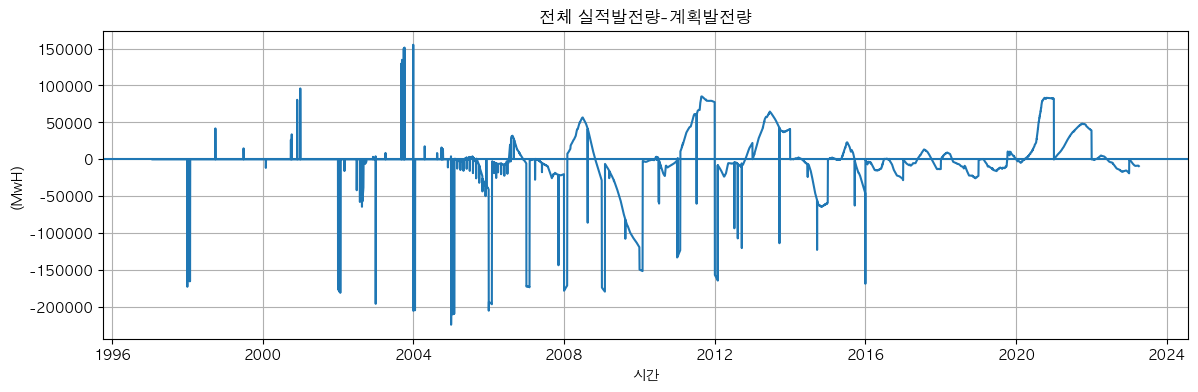

In [42]:
sns.lineplot((dailyDf['발전량(실적)']-dailyDf['발전량(계획)']))
plt.title("전체 실적발전량-계획발전량")
plt.ylabel('(MwH)')
plt.axhline(0)

In [62]:
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])>=0 , '초과' , '부족')
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])==0 , '적절계획' , dailyDf['실적-계획'])



In [184]:
df2016 = dailyDf['2016-01-01 00:00:00': '2017-01-01 00:00:00']
df2017 = dailyDf['2017-01-01 00:00:00': '2018-01-01 00:00:00']
df2018 = dailyDf['2018-01-01 00:00:00': '2019-01-01 00:00:00']
df2019 = dailyDf['2019-01-01 00:00:00': '2020-01-01 00:00:00']
df2020 = dailyDf['2020-01-01 00:00:00': '2021-01-01 00:00:00']
df2021 = dailyDf['2021-01-01 00:00:00': '2022-01-01 00:00:00']



/var/folders/k7/9gs0gtnx2mq7v2qxmtqtbmbh0000gn/T/ipykernel_1871/1018948599.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0.5, 1.0, '2021')

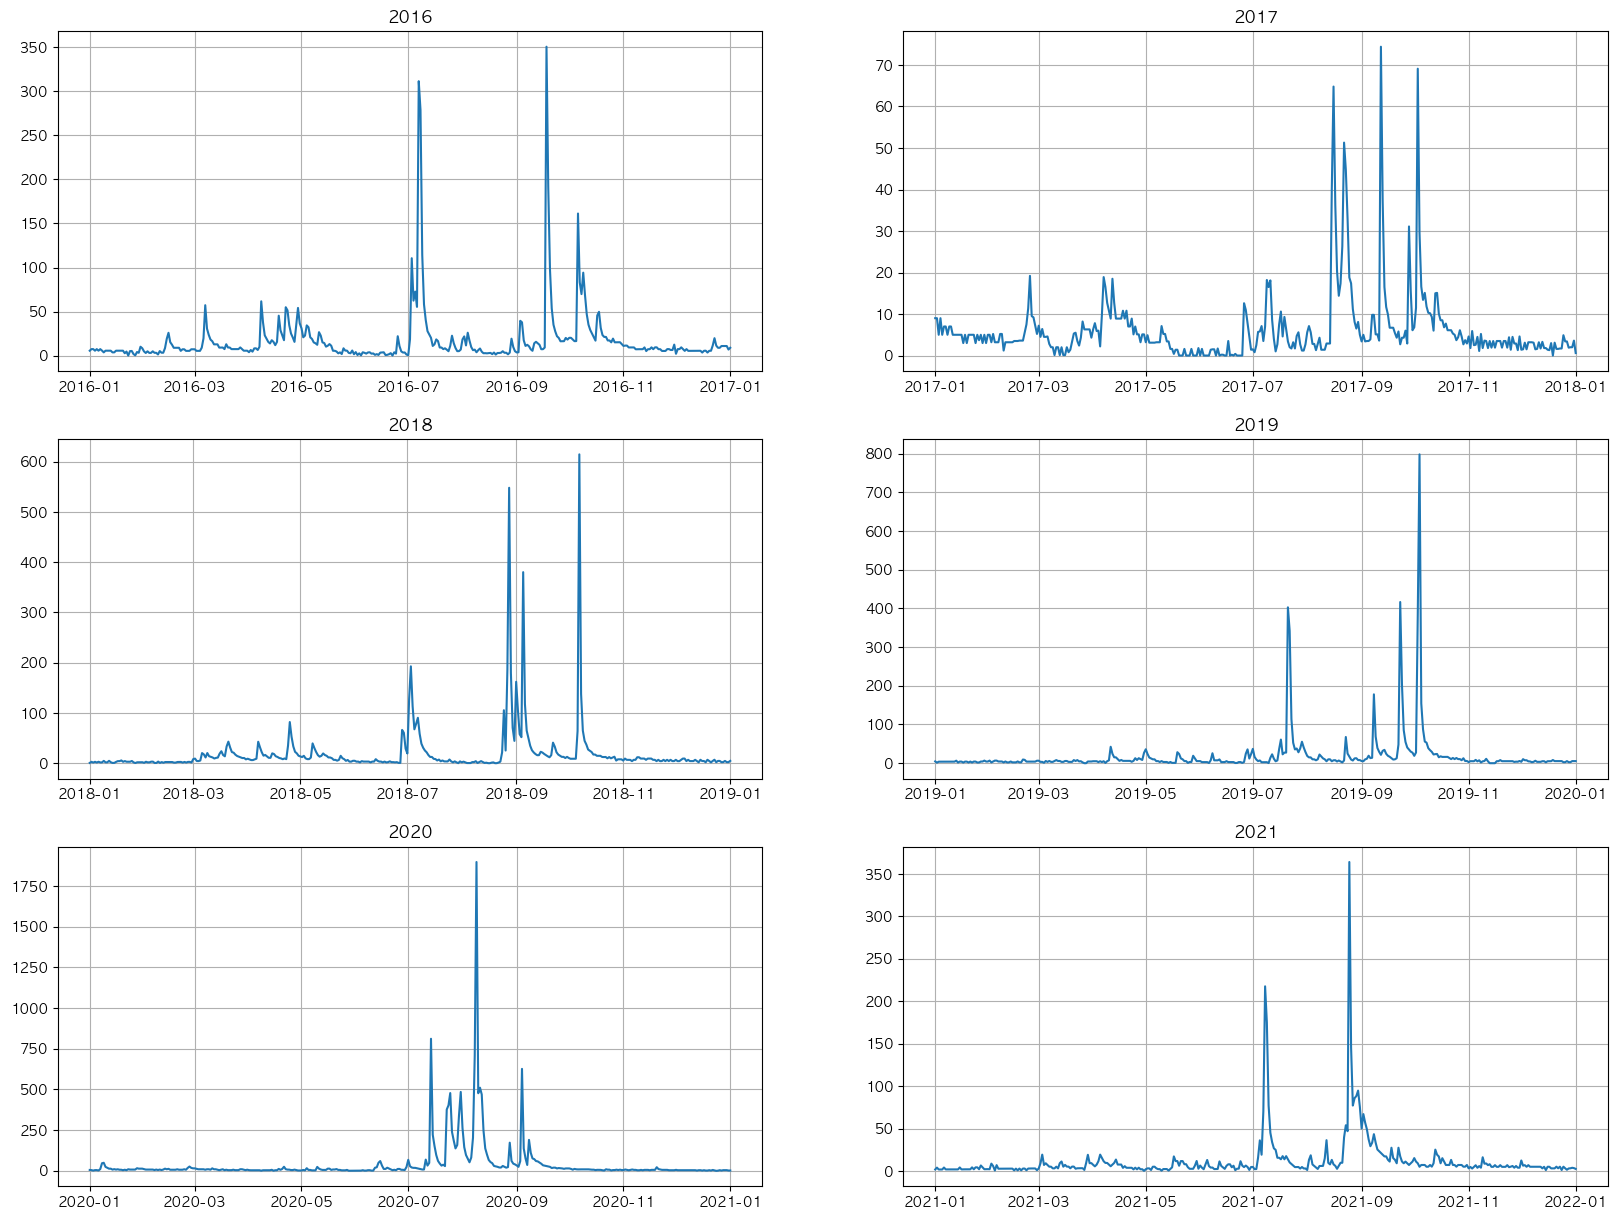

In [190]:
plt.figure(figsize=(20,15))
plt.title('16-21 전일유입량')

plt.subplot(3,2,1)
plt.plot(df2016.index, df2016['전일유입량'])
plt.title('2016')

plt.subplot(3,2,2)
plt.plot(df2017.index, df2017['전일유입량'])
plt.title('2017')

plt.subplot(3,2,3)
plt.plot(df2018.index, df2018['전일유입량'])
plt.title('2018')

plt.subplot(3,2,4)
plt.plot(df2019.index, df2019['전일유입량'])
plt.title('2019')

plt.subplot(3,2,5)
plt.plot(df2020.index, df2020['전일유입량'])
plt.title('2020')

plt.subplot(3,2,6)
plt.plot(df2021.index, df2021['전일유입량'])
plt.title('2021')



In [63]:

dailyDf

,발전량(실적),발전량(계획),발전량(계획대비),연간발전계획,연간계획대비,전일유입량,저수위(전년),저수량(전년),저수위(현재),저수량(현재),...,저수량(예년),예년누계강우량,강우량전일,금년누계강우량,현재저수율,전일방류량(본댐),전일방류량(조정지),전년누계강우량,강우량금일,실적-계획
시간,,,,,,,,,,,,,,,,,,,,,
1997-01-29,0.0,0.0,0.0,0.0,0.0,1.7,148.88,246.6,149.220000,250.700000,...,277.6,39.6,0.0,9.800000,31.700000,13.0,13.0,23.0,0.000000,적절계획
1997-01-30,0.0,0.0,0.0,0.0,0.0,1.8,148.81,245.7,149.170909,250.145455,...,276.6,41.7,0.0,9.800000,31.663636,13.0,13.0,23.0,0.000000,적절계획
1997-01-31,0.0,0.0,0.0,0.0,0.0,1.8,148.75,245.0,149.108235,249.382353,...,275.5,42.5,0.0,9.800000,31.570588,13.0,13.0,23.0,0.000000,적절계획
1997-02-01,0.0,0.0,0.0,0.0,0.0,1.8,148.69,244.3,149.032632,248.400000,...,274.3,42.5,0.0,9.800000,31.457895,13.0,13.0,23.0,0.000000,적절계획
1997-02-02,0.0,0.0,0.0,0.0,0.0,1.6,148.62,243.5,149.001667,248.044444,...,273.4,43.9,0.0,9.800000,31.388889,10.0,10.0,23.0,0.000000,적절계획
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,12555.0,21114.0,59.5,104486.0,12.0,2.7,154.66,318.0,146.269583,212.637500,...,326.0,120.1,0.0,75.400000,26.900000,1.3,5.2,71.2,0.000000,부족
2023-04-02,12654.0,21348.0,59.3,104486.0,12.1,2.3,154.63,317.6,146.250000,212.441667,...,325.5,121.7,0.0,75.400000,26.900000,5.0,5.3,71.2,0.000000,부족
2023-04-03,12751.0,21582.0,59.1,104486.0,12.2,2.6,154.59,317.2,146.230417,212.216667,...,324.9,123.3,0.0,75.400000,26.870833,5.0,5.1,71.2,0.000000,부족


In [71]:
dailyDf['실적-계획'].unique()

array(['적절계획', '부족', '초과'], dtype=object)

Text(0.5, 1.0, '계획발전량과 실적발전량 비교')

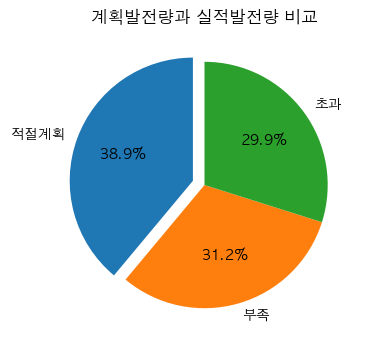

In [79]:
plt.pie(dailyDf['실적-계획'].value_counts(), labels=dailyDf['실적-계획'].unique(),autopct='%1.1f%%', startangle=90, explode=(0.1,0,0))
plt.title("계획발전량과 실적발전량 비교")

In [94]:
df.isna().sum()

댐이름           0
발전량(실적)       0
발전량(계획)       0
발전량(계획대비)     0
연간발전계획        0
연간계획대비        0
전일유입량         0
저수위(전년)       0
저수량(전년)       0
저수위(현재)       0
저수량(현재)       0
저수위(예년)       0
저수량(예년)       0
예년누계강우량       0
강우량전일         0
금년누계강우량       0
현재저수율         0
수계            0
전일방류량(본댐)     0
전일방류량(조정지)    0
전년누계강우량       0
강우량금일         0
dtype: int64

In [90]:
dailyDf.isnull().sum()

발전량(실적)       20
발전량(계획)       20
발전량(계획대비)     20
연간발전계획        20
연간계획대비        20
전일유입량         20
저수위(전년)       20
저수량(전년)       20
저수위(현재)       20
저수량(현재)       20
저수위(예년)       20
저수량(예년)       20
예년누계강우량       20
강우량전일         20
금년누계강우량       20
현재저수율         20
전일방류량(본댐)     20
전일방류량(조정지)    20
전년누계강우량       20
강우량금일         20
실적-계획          0
dtype: int64

In [86]:
dailyDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9563 entries, 1997-01-29 to 2023-04-05
Freq: D
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발전량(실적)     9543 non-null   float64
 1   발전량(계획)     9543 non-null   float64
 2   발전량(계획대비)   9543 non-null   float64
 3   연간발전계획      9543 non-null   float64
 4   연간계획대비      9543 non-null   float64
 5   전일유입량       9543 non-null   float64
 6   저수위(전년)     9543 non-null   float64
 7   저수량(전년)     9543 non-null   float64
 8   저수위(현재)     9543 non-null   float64
 9   저수량(현재)     9543 non-null   float64
 10  저수위(예년)     9543 non-null   float64
 11  저수량(예년)     9543 non-null   float64
 12  예년누계강우량     9543 non-null   float64
 13  강우량전일       9543 non-null   float64
 14  금년누계강우량     9543 non-null   float64
 15  현재저수율       9543 non-null   float64
 16  전일방류량(본댐)   9543 non-null   float64
 17  전일방류량(조정지)  9543 non-null   float64
 18  전년누계강우량     9543 non-null   float64
 19  강